In [ ]:
# Montamos nuestro Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Seleccionamos la carpeta y verificamos los contenidos
%cd "/content/drive/MyDrive/TC3002B-IA"
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TC3002B-IA
external-imgs  model  smile_no_smile_v1.h5


In [ ]:
# Importamos las bibliotecas de preprocesado de datos
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers

# Directorios de trabajo
base_dir = 'model'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')

Found 963 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
(8, 64, 64, 3)
[1. 0. 0. 0. 0. 0. 0. 0.]


<Figure size 640x480 with 0 Axes>

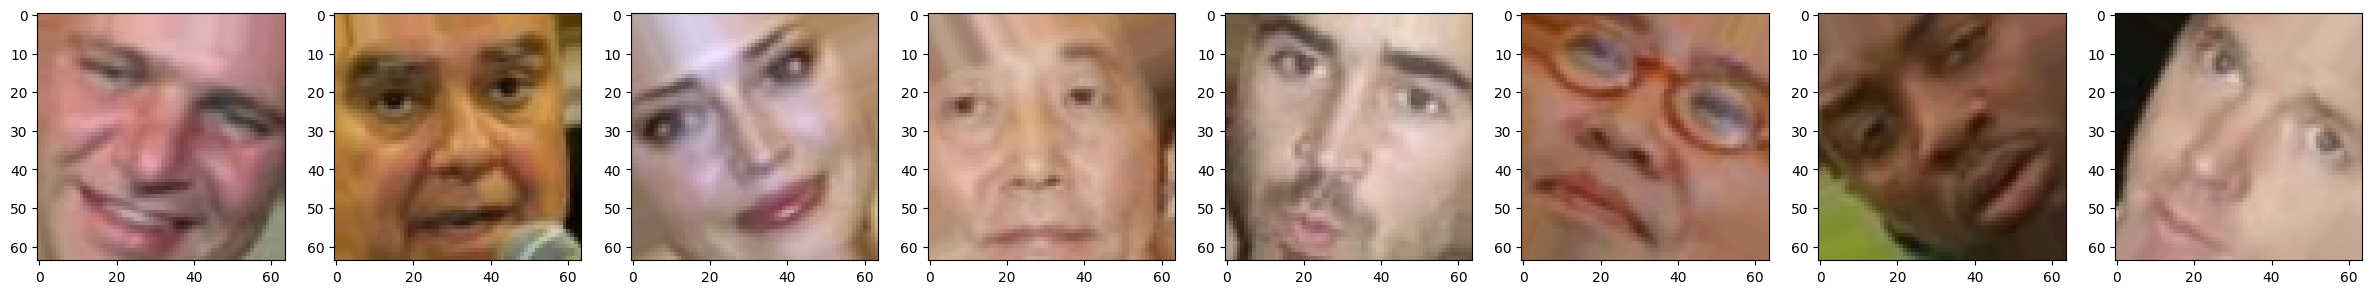

In [ ]:
# Data augmentation
train_datagen = ImageDataGenerator(
							rescale = 1./255,
							rotation_range = 40,
						  width_shift_range = 0.1,
						  shear_range = 0.15,
							horizontal_flip = True)

train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (64, 64),
							batch_size = 8,
							class_mode ='binary',
							)

test_datagen = ImageDataGenerator(1./255)
test_generator = test_datagen.flow_from_directory(
					test_dir,
					target_size = (64, 64),
					batch_size = 20,
					class_mode= 'binary')

val_datagen = ImageDataGenerator(1./255)
val_generator = val_datagen.flow_from_directory(
							validation_dir,
							target_size = (64,64),
							batch_size = 20,
							class_mode= 'binary')

# Muestra la augmentation
images , labels = train_generator[0]

print(images.shape)
print(labels)

plt.figure()
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4))

for i in range(images.shape[0]) :
  axarr[i].imshow(images[i])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 62, 62, 10)        280       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 31, 31, 10)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 29, 29, 10)        910       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 14, 14, 10)        0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 1960)              0         
                                                                 
 dense_10 (Dense)            (None, 64)               

Epoch 1/10
121/121 [==============================] - 293s 2s/step - loss: 0.6950 - acc: 0.5389 - val_loss: 49.5457 - val_acc: 0.5000
Epoch 2/10
121/121 [==============================] - 11s 89ms/step - loss: 0.6151 - acc: 0.6957 - val_loss: 35.7589 - val_acc: 0.6900
Epoch 3/10
121/121 [==============================] - 8s 66ms/step - loss: 0.4981 - acc: 0.7871 - val_loss: 85.0365 - val_acc: 0.6200
Epoch 4/10
121/121 [==============================] - 8s 68ms/step - loss: 0.4154 - acc: 0.8318 - val_loss: 31.7213 - val_acc: 0.8500
Epoch 5/10
121/121 [==============================] - 10s 79ms/step - loss: 0.3632 - acc: 0.8609 - val_loss: 33.6210 - val_acc: 0.8800
Epoch 6/10
121/121 [==============================] - 9s 70ms/step - loss: 0.3628 - acc: 0.8577 - val_loss: 34.8534 - val_acc: 0.9200
Epoch 7/10
121/121 [==============================] - 9s 74ms/step - loss: 0.3349 - acc: 0.8650 - val_loss: 39.3887 - val_acc: 0.9400
Epoch 8/10
121/121 [==============================] - 10s 79

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


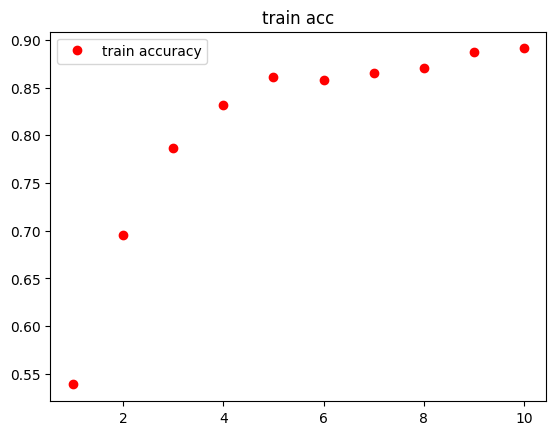

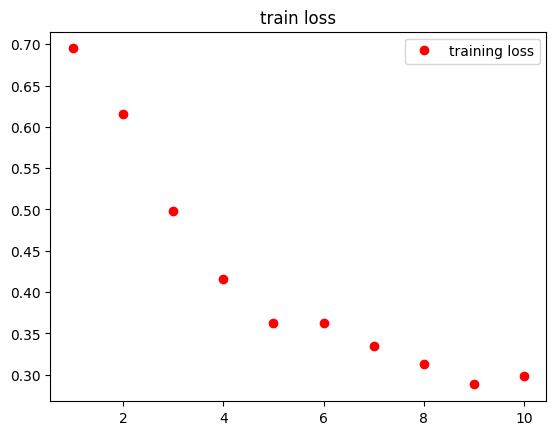

In [ ]:
# Creación del modelo
model = models.Sequential()
model.add(layers.Conv2D(10, (3,3), activation="relu", input_shape=(64,64,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(10, (3,3), activation="relu", input_shape=(64,64,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',
						optimizer=optimizers.RMSprop(lr=2e-5),
						metrics=['acc'])

history = model.fit(
					train_generator,
					epochs = 10,
					validation_data= val_generator,
					validation_steps = 5)

acc = history.history['acc']
loss = history.history['loss']

model.save('smile_no_smile_v1.h5')

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'ro',label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'ro', label ='training loss')
plt.title('train loss')
plt.legend()

plt.show()

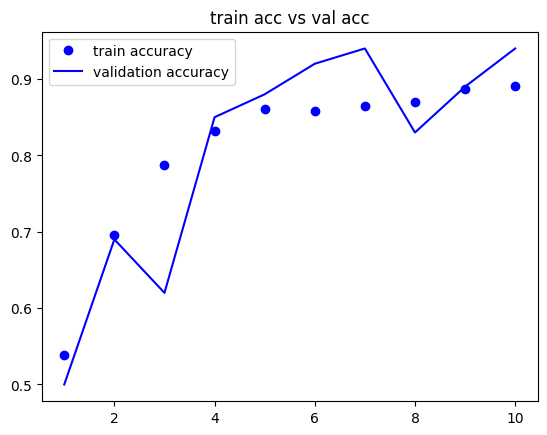

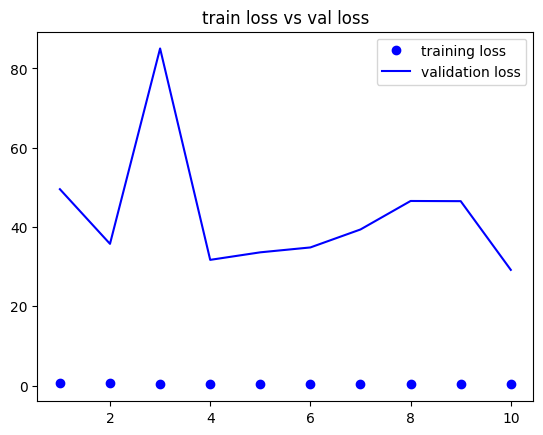

<ipython-input-21-569c15097a8b>:19: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator)
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(



test acc :
 0.9333333373069763
  Model  test loss  test accuracy  train loss  train accuracy  val accuracy  \
0    V1   16.70388       0.933333      0.2981           0.891          0.94   

   val loss  
0    29.195  


In [21]:
# Evaluación del modelo
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.plot(epochs,val_acc, 'b', label='validation accuracy')
plt.title('train acc vs val acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.plot(epochs,val_loss, 'b', label = 'validation loss')
plt.title('train loss vs val loss')
plt.legend()

plt.show()

test_loss, test_acc = model.evaluate_generator(test_generator)
print('\ntest acc :\n', test_acc)

# Reporte de resultados
data = {
    'Model': ['V1'],
    'test loss': [test_loss],
    'test accuracy': [test_acc],
    'train loss' : [0.2981],
    'train accuracy' : [0.8910],
    'val accuracy' : [0.9400],
    'val loss' : [29.1950]
}

results = pd.DataFrame(data)

print(results)

# Procesado y predicción de imágenes